<a href="https://colab.research.google.com/github/Zulfahanamaulida/TA_Deteksi-Residu-Pestisida/blob/main/Preprocessing/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


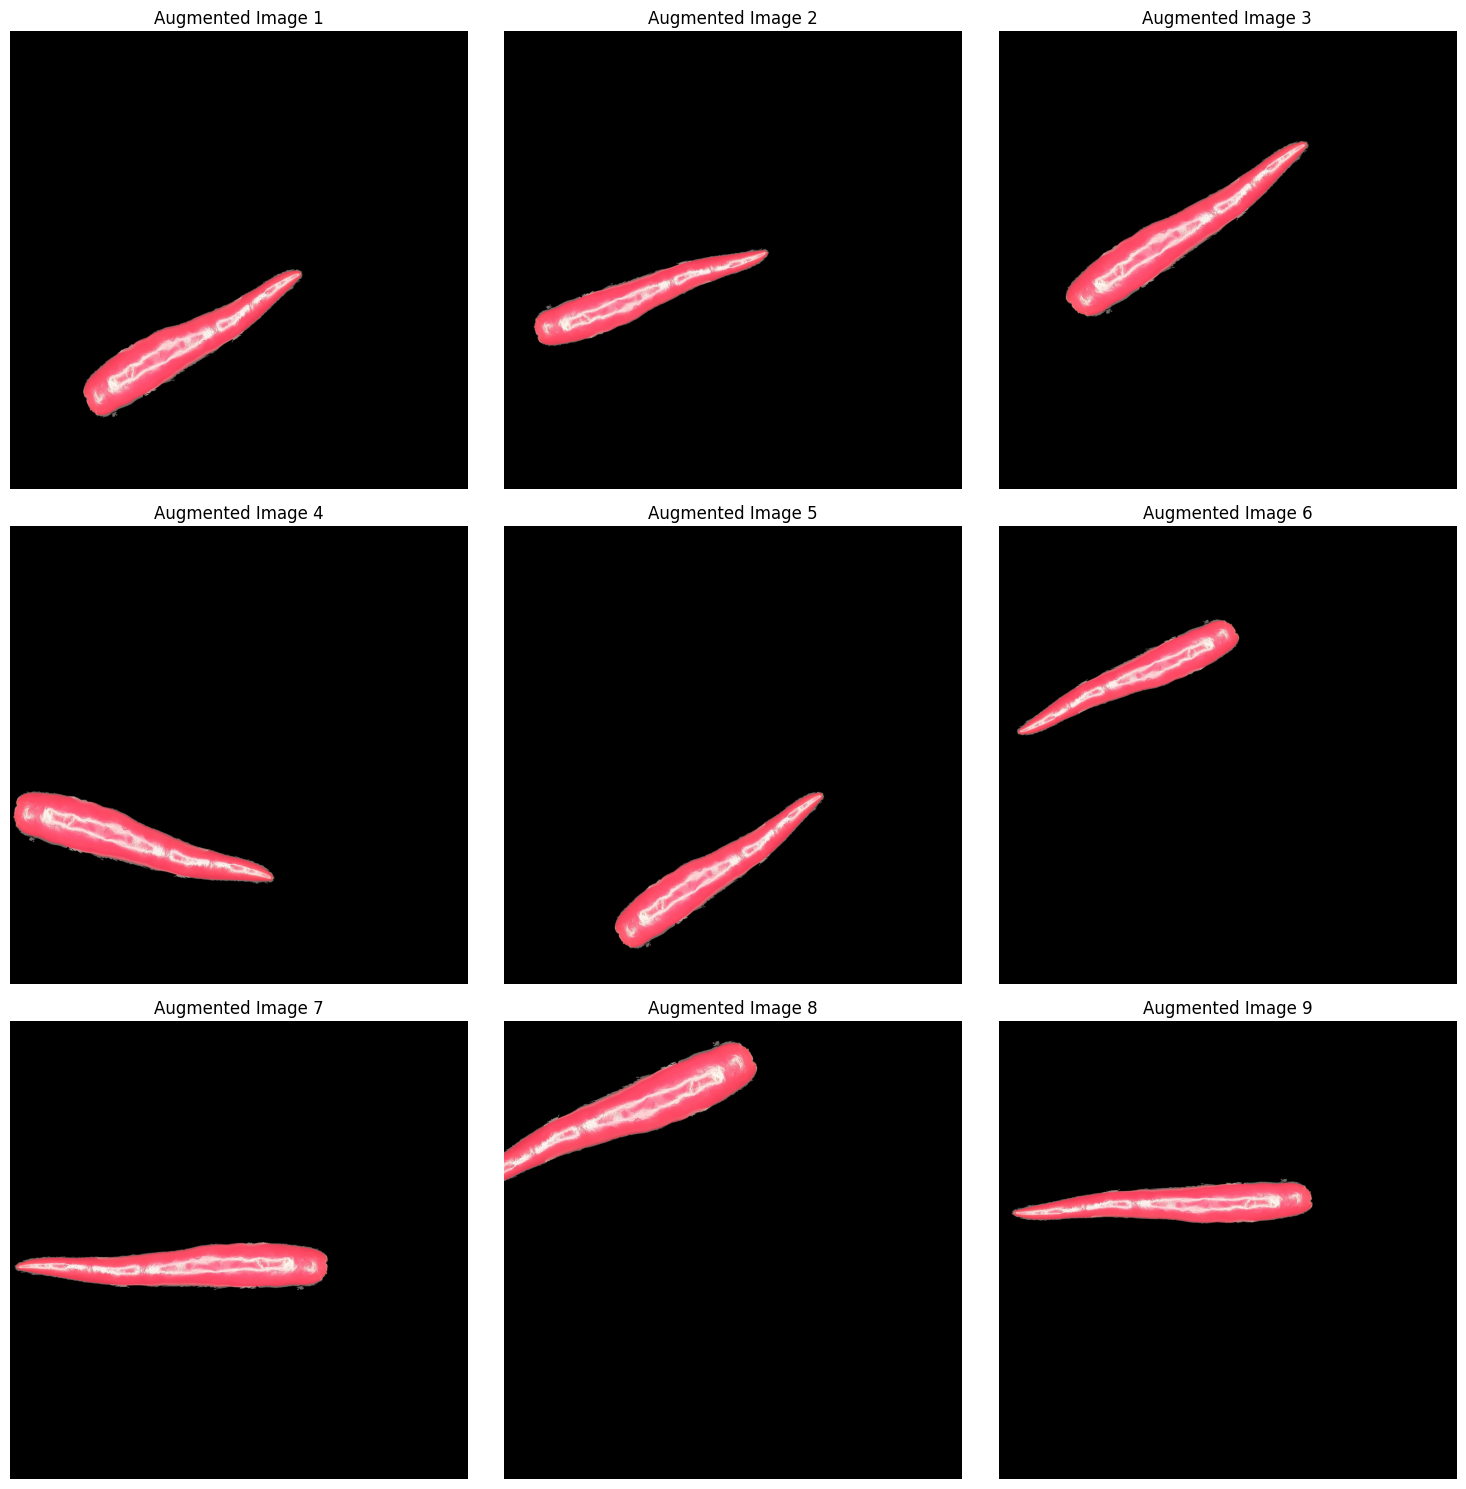

In [125]:
# Define input path
input_path = "/content/drive/MyDrive/Tugas Akhir_Zulfa Hana Maulida(1)/Preprocessing/ROI/Image/Multiclass/10000 ppm"

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

# Load an image from the input path
img = load_img(os.path.join(input_path, "15.jpg"))
x = img_to_array(img)  # Convert image to numpy array
x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

# Generate augmented images and save to the output directory
output_path = "/content/drive/MyDrive/Tugas Akhir_Zulfa Hana Maulida(1)/Preprocessing/ROI/Image/Multiclass/10000 ppm"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Generate and save augmented images
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=output_path, save_prefix='15_augmented', save_format='jpg'):
    i += 1
    if i > 8:  # Generate 8 augmented images
        break  # Break the loop to avoid infinite generation

# Get list of augmented image files
augmented_files = sorted([file for file in os.listdir(output_path) if file.startswith('15_augmented')])

# Calculate the number of rows needed
num_augmentations = len(augmented_files)
num_rows = (num_augmentations + 2) // 3  # Round up to the nearest multiple of 3

# Display augmented images
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

for i, file in enumerate(augmented_files):
    img = load_img(os.path.join(output_path, file))
    row_index = i // 3
    col_index = i % 3
    axes[row_index, col_index].imshow(img)
    axes[row_index, col_index].set_title(f"Augmented Image {i+1}")
    axes[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()